<img src="small_images.jpg" />

In [214]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [233]:
dataset_dir = "dataset"

In [234]:
class_labels = ['bike', 'car', 'truck','cart', 'bicycle']
class_directories = ['bike', 'car', 'truck','cart','bicycle']

In [235]:
image_width, image_height = 224, 224
input_shape = (image_width, image_height, 3)
num_classes = len(class_labels)
test_size = 0.2
random_state = 42
epochs = 10
batch_size = 32

In [236]:
images = []
labels = []

In [237]:
for i, class_dir in enumerate(class_directories):
    dir_path = os.path.join(dataset_dir, class_dir)
    images_list = os.listdir(dir_path)
    for image_name in images_list:
        image_path = os.path.join(dir_path, image_name)
        try:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (image_width, image_height))
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error occurred while processing image: {image_path}")
            print(f"Error message: {str(e)}")

In [241]:
X = np.array(images)
y = np.array(labels)

In [242]:
# y = tf.keras.utils.to_categorical(y, num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

X_test.shape

(754, 224, 224, 3)

In [243]:
y_test.shape

(754,)

In [244]:
X_train.shape

(3016, 224, 224, 3)

In [245]:
y_train.shape

(3016,)

In [246]:
y_train[:5]

array([3, 2, 0, 3, 1])

In [247]:
# y_train = y_train.reshape(-1, num_classes)
y_train[:5]

array([3, 2, 0, 3, 1])

In [248]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    label_index = y[index]
    class_label = class_labels[label_index]
    plt.xlabel(class_label)

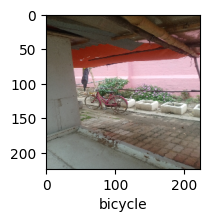

In [249]:
plot_sample(X_train, y_train, 0)

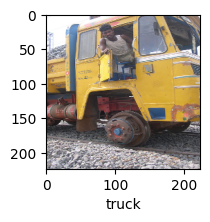

In [250]:
plot_sample(X_train, y_train, 1)

In [251]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [252]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [253]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [254]:
dataset_dir

'dataset'

In [255]:
len(X_train)

3016

In [256]:
len(y_train)

3016

In [257]:

cnn.fit(X_train, y_train, epochs=epochs)


Epoch 1/10
95/95 [==============================] - 160s 2s/step - loss: 0.9291 - accuracy: 0.6615
Epoch 2/10
95/95 [==============================] - 141s 1s/step - loss: 0.3622 - accuracy: 0.8641
Epoch 3/10
95/95 [==============================] - 140s 1s/step - loss: 0.1215 - accuracy: 0.9649
Epoch 4/10
95/95 [==============================] - 134s 1s/step - loss: 0.0421 - accuracy: 0.9884
Epoch 5/10
95/95 [==============================] - 137s 1s/step - loss: 0.0168 - accuracy: 0.9980
Epoch 6/10
95/95 [==============================] - 129s 1s/step - loss: 0.0077 - accuracy: 0.9983
Epoch 7/10
95/95 [==============================] - 129s 1s/step - loss: 0.0019 - accuracy: 0.9997
Epoch 8/10
95/95 [==============================] - 128s 1s/step - loss: 5.5785e-04 - accuracy: 1.0000
Epoch 9/10
95/95 [==============================] - 128s 1s/step - loss: 3.4418e-04 - accuracy: 1.0000
Epoch 10/10
95/95 [==============================] - 127s 1s/step - loss: 2.5118e-04 - accuracy: 1.00

In [258]:
cnn.evaluate(X_test,y_test)

24/24 [==============================] - 15s 404ms/step - loss: 1.0509 - accuracy: 0.8196


[1.0508912801742554, 0.8196286559104919]

In [259]:
y_pred = cnn.predict(X_test)
y_pred[:5]

24/24 [==============================] - 10s 378ms/step


array([[4.1213909e-01, 7.1474269e-02, 5.1345396e-01, 2.9326563e-03],
       [5.9969629e-09, 9.9999797e-01, 2.0322186e-06, 1.1456357e-11],
       [1.0000000e+00, 1.1970535e-11, 4.0286110e-14, 1.1336595e-21],
       [9.0821537e-05, 9.9514210e-01, 4.7671180e-03, 5.7374860e-10],
       [1.6863918e-01, 6.8971539e-01, 1.4164412e-01, 1.3191075e-06]],
      dtype=float32)

In [260]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[2, 1, 0, 1, 1]

In [261]:
y_test[:5]

array([1, 1, 0, 1, 2])

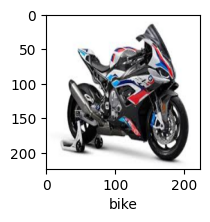

In [299]:
plot_sample(X_test, y_test,0)

In [328]:
def predict(y_pred):
    predict = np.argmax(y_pred)
    if predict==0: print("bike")
    elif predict==1: print("car")
    elif predict==2: print("truck")
    else: print("bicycle")

In [338]:
predict(y_pred[28])

car


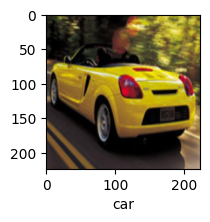

In [339]:
plot_sample(X_test, y_test,28)

In [342]:
import pickle

file_path = 'model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(cnn, file)
    file.close()
